### Data Set Information:

### Importing dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df=pd.read_csv('mushrooms.csv')

In [63]:
df.shape

(8124, 23)

In [64]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### There is no missing values in dataset. It has 23 feature including one target variable. All feature are with object datatype

In [66]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Objective:
    In this project we will try to investigate and analyze dataset to answer mainly following two questions.
    
1.What types of machine learning models perform best on this dataset?

2.Which features are most indicative of a poisonous mushroom?

# EDA

In [67]:
df['class'].unique()

array(['p', 'e'], dtype=object)

 class p represent poisonous mushroom and class e represent ediable mushroom species.

In [68]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

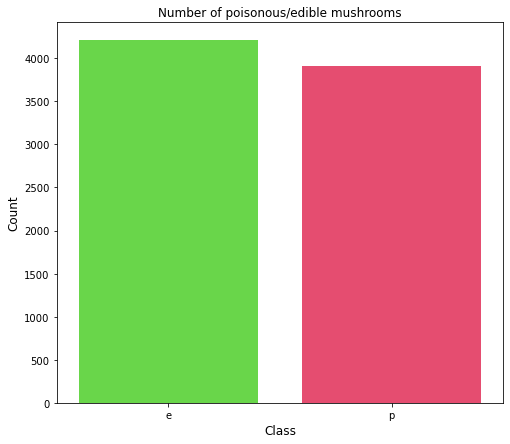

In [69]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index,count.values, alpha=0.8, palette='prism')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [70]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [71]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Converting Categorical data using Label Encoder

In [72]:
df =df.astype('category')

In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [74]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [75]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Feature selection

In [76]:
df['veil-type'].unique()

array([0])

 The column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [77]:
df= df.drop(['veil-type'], axis=1)

##### Checking correlation between features

In [78]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

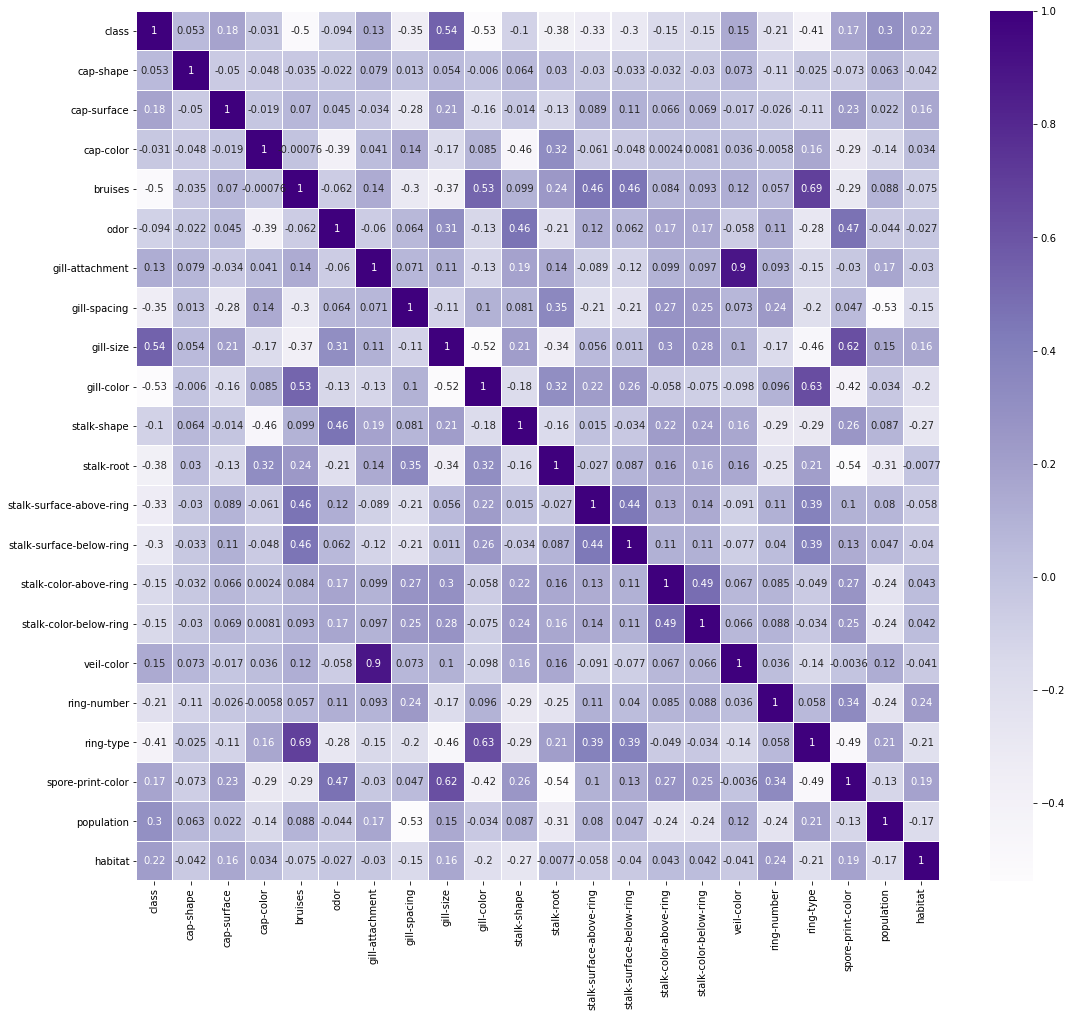

In [79]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), linewidths=.1, cmap='Purples', annot= True)

##### Checking Multicollinearity between features using variance_inflation_factor

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
X= df.drop(columns=['class'])
Y= df['class']

In [82]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,5.463186,cap-shape
1,3.904712,cap-surface
2,5.950600,cap-color
3,7.984231,bruises
4,8.918271,odor
5,256.122838,gill-attachment
6,4.534113,gill-spacing
7,5.758180,gill-size
8,6.284702,gill-color
9,9.243136,stalk-shape


In [83]:
df= df.drop(['veil-color','ring-type','bruises','spore-print-color','ring-number','gill-attachment'], axis=1)

In [84]:
df.shape

(8124, 16)

In [85]:
X= df.drop(columns=['class'])
Y= df['class']

In [86]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,5.060168,cap-shape
1,3.619876,cap-surface
2,5.386184,cap-color
3,6.728792,odor
4,2.277863,gill-spacing
5,2.741394,gill-size
6,4.869965,gill-color
7,4.187318,stalk-shape
8,3.269927,stalk-root
9,10.087702,stalk-surface-above-ring


## Machine Learning Algorithm

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5443, 15)
Training target vector size: (5443,)
Test feature matrix size: (2681, 15)
Test target vector size: (2681,)


### Finding best Random state

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9511376352107422 on Random_state 233


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=233, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9511376352107422


Confusion matrix of Logistics Regression : 
 [[1351   49]
 [  82 1199]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1400
           1       0.96      0.94      0.95      1281

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [103]:
mnb = MultinomialNB()
svc=SVC()
dtc = DecisionTreeClassifier()

model = [mnb,svc,dtc]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix MultinomialNB() is


Accuracy Score :
 0.8314061917195077


Confusion matrix : 
 [[1254  146]
 [ 306  975]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1400
           1       0.87      0.76      0.81      1281

    accuracy                           0.83      2681
   macro avg       0.84      0.83      0.83      2681
weighted avg       0.84      0.83      0.83      2681



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9847071988064156


Confusion matrix : 
 [[1392    8]
 [  33 1248]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1400
           1       0.99      0.97      0.98      1281

    accuracy                           0.98      2681
   macro avg       0.99      0.98      0.98      2681
weighted avg       0.98      0.98      0.98  

### CrossValidation :

In [116]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X, Y, cv =6)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.88183161 1.         1.         1.         1.         0.69423929]
Mean Score : 0.9293451501723289
Std deviation : 0.11365205140706171


In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_reg, X, Y, cv =6)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.65476923 0.97723077 0.87507692 0.99876923 0.52093596]
Mean Score : 0.8053564228874575
Std deviation : 0.18728681487666363


In [117]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(mnb, X, Y, cv =6)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.55834564 0.69350074 0.75997046 0.88478582 0.9534712  0.80649926]
Mean Score : 0.7760955194485475
Std deviation : 0.1282556197888881


In [113]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X, Y, cv =6)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.79323077 0.99261538 0.88923077 0.99938462 0.5       ]
Mean Score : 0.8348923076923077
Std deviation : 0.18372560966008636


## Hyper Parameter Tuning : GridSearchCV

In [159]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameter = {'max_depth': range(2,20,3),
            'criterion':['gini','entropy'],
            'splitter':['best','random']}

In [167]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=6)

In [168]:
GCV.fit(X_train,Y_train)


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'splitter': ['best', 'random']})

In [169]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14, 'splitter': 'best'}

## Final Model

In [170]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth=14,splitter='best')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 1.0


## Saving model

In [171]:
import joblib

In [172]:
joblib.dump(Final_mod,'Mushroom_Final.pkl')

['Mushroom_Final.pkl']